## sys.pathの設定

In [1]:
import sys
sys.path.append('..')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19333333333333333
                : 10. 正答率(テスト) = 0.1497
Generation: 20. 正答率(トレーニング) = 0.29
                : 20. 正答率(テスト) = 0.2362
Generation: 30. 正答率(トレーニング) = 0.3933333333333333
                : 30. 正答率(テスト) = 0.2918
Generation: 40. 正答率(トレーニング) = 0.5366666666666666
                : 40. 正答率(テスト) = 0.3826
Generation: 50. 正答率(トレーニング) = 0.57
                : 50. 正答率(テスト) = 0.4382
Generation: 60. 正答率(トレーニング) = 0.6633333333333333
                : 60. 正答率(テスト) = 0.4961
Generation: 70. 正答率(トレーニング) = 0.6966666666666667
                : 70. 正答率(テスト) = 0.5433
Generation: 80. 正答率(トレーニング) = 0.7233333333333334
                : 80. 正答率(テスト) = 0.5702
Generation: 90. 正答率(トレーニング) = 0.7833333333333333
                : 90. 正答率(テスト) = 0.6126
Generation: 100. 正答率(トレーニング) = 0.8133333333333334
                : 100. 正答率(テスト) = 0.6548
Generation: 110. 正答率(トレーニング) = 0.83
                : 110. 正答率(テスト) = 0.6576
Generation: 120. 正答率(トレーニング) = 0.846666666666666

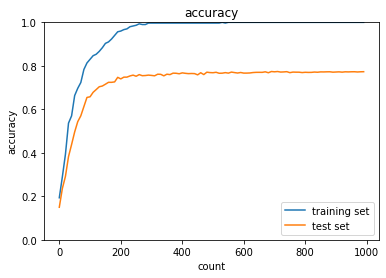

In [2]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1195
Generation: 20. 正答率(トレーニング) = 0.23666666666666666
                : 20. 正答率(テスト) = 0.1752
Generation: 30. 正答率(トレーニング) = 0.3233333333333333
                : 30. 正答率(テスト) = 0.2521
Generation: 40. 正答率(トレーニング) = 0.39
                : 40. 正答率(テスト) = 0.3073
Generation: 50. 正答率(トレーニング) = 0.43
                : 50. 正答率(テスト) = 0.3343
Generation: 60. 正答率(トレーニング) = 0.47
                : 60. 正答率(テスト) = 0.3553
Generation: 70. 正答率(トレーニング) = 0.5166666666666667
                : 70. 正答率(テスト) = 0.3834
Generation: 80. 正答率(トレーニング) = 0.55
                : 80. 正答率(テスト) = 0.415
Generation: 90. 正答率(トレーニング) = 0.5833333333333334
                : 90. 正答率(テスト) = 0.4304
Generation: 100. 正答率(トレーニング) = 0.59
                : 100. 正答率(テスト) = 0.4468
Generation: 110. 正答率(トレーニング) = 0.6066666666666667
                : 110. 正答率(テスト) = 0.4648
Generation: 120. 正答率(トレーニング) = 0.6133333333333333
                : 120. 正答率(テスト) = 0.4672


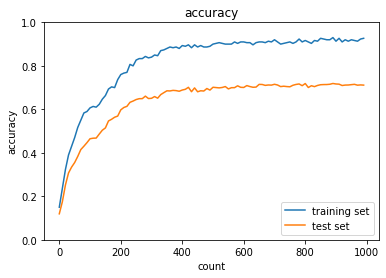

In [3]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.34
                : 10. 正答率(テスト) = 0.2375
Generation: 20. 正答率(トレーニング) = 0.5466666666666666
                : 20. 正答率(テスト) = 0.4277
Generation: 30. 正答率(トレーニング) = 0.63
                : 30. 正答率(テスト) = 0.4896
Generation: 40. 正答率(トレーニング) = 0.6933333333333334
                : 40. 正答率(テスト) = 0.5554
Generation: 50. 正答率(トレーニング) = 0.5466666666666666
                : 50. 正答率(テスト) = 0.494
Generation: 60. 正答率(トレーニング) = 0.89
                : 60. 正答率(テスト) = 0.7018
Generation: 70. 正答率(トレーニング) = 0.5366666666666666
                : 70. 正答率(テスト) = 0.4156
Generation: 80. 正答率(トレーニング) = 0.6666666666666666
                : 80. 正答率(テスト) = 0.5612
Generation: 90. 正答率(トレーニング) = 0.7666666666666667
                : 90. 正答率(テスト) = 0.5662
Generation: 100. 正答率(トレーニング) = 0.7933333333333333
                : 100. 正答率(テスト) = 0.6178
Generation: 110. 正答率(トレーニング) = 0.6266666666666667
                : 110. 正答率(テスト) = 0.5055
Generation: 120. 正答率(トレーニング) = 0.8533333333333334


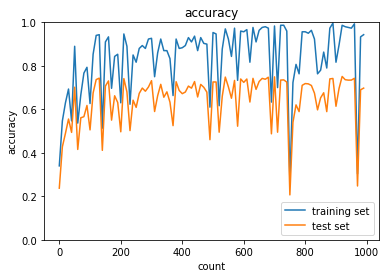

In [4]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

## Dropout

In [5]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.07333333333333333
                : 10. 正答率(テスト) = 0.0924
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.0968
Generation: 30. 正答率(トレーニング) = 0.08666666666666667
                : 30. 正答率(テスト) = 0.1001
Generation: 40. 正答率(トレーニング) = 0.10333333333333333
                : 40. 正答率(テスト) = 0.1063
Generation: 50. 正答率(トレーニング) = 0.12333333333333334
                : 50. 正答率(テスト) = 0.1221
Generation: 60. 正答率(トレーニング) = 0.17333333333333334
                : 60. 正答率(テスト) = 0.1478
Generation: 70. 正答率(トレーニング) = 0.22
                : 70. 正答率(テスト) = 0.1724
Generation: 80. 正答率(トレーニング) = 0.26
                : 80. 正答率(テスト) = 0.1967
Generation: 90. 正答率(トレーニング) = 0.2833333333333333
                : 90. 正答率(テスト) = 0.2141
Generation: 100. 正答率(トレーニング) = 0.3
                : 100. 正答率(テスト) = 0.2396
Generation: 110. 正答率(トレーニング) = 0.32666666666666666
                : 110. 正答率(テスト) = 0.2497
Generation: 120. 正答率(トレーニング) = 0.33666666666666667
       

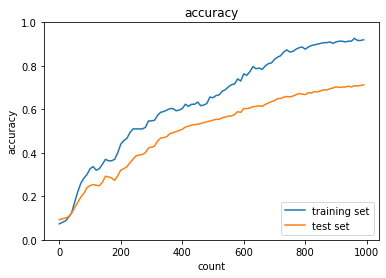

In [6]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1335
Generation: 20. 正答率(トレーニング) = 0.18333333333333332
                : 20. 正答率(テスト) = 0.1461
Generation: 30. 正答率(トレーニング) = 0.20333333333333334
                : 30. 正答率(テスト) = 0.1543
Generation: 40. 正答率(トレーニング) = 0.25
                : 40. 正答率(テスト) = 0.172
Generation: 50. 正答率(トレーニング) = 0.27666666666666667
                : 50. 正答率(テスト) = 0.1863
Generation: 60. 正答率(トレーニング) = 0.2633333333333333
                : 60. 正答率(テスト) = 0.1944
Generation: 70. 正答率(トレーニング) = 0.2633333333333333
                : 70. 正答率(テスト) = 0.2026
Generation: 80. 正答率(トレーニング) = 0.27
                : 80. 正答率(テスト) = 0.2089
Generation: 90. 正答率(トレーニング) = 0.26666666666666666
                : 90. 正答率(テスト) = 0.2136
Generation: 100. 正答率(トレーニング) = 0.2866666666666667
                : 100. 正答率(テスト) = 0.2221
Generation: 110. 正答率(トレーニング) = 0.29
                : 110. 正答率(テスト) = 0.2263
Generation: 120. 正答率(トレーニング) = 0.29
         

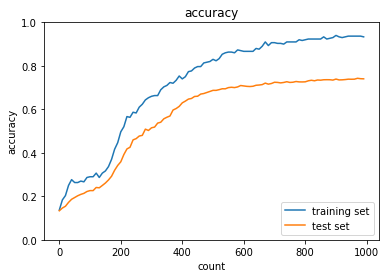

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()